<a href="https://colab.research.google.com/github/Gaba-csm/DEA113/blob/main/MidTerm_GabrielaCerball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Gaba-csm/DEA113/refs/heads/main/titanic.csv'
data = pd.read_csv(url)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


**1. Percentage of missing values**

In [4]:
#To get the percentage of null values in each column
(data.isnull().sum()/len(data))*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


**2. Handling missing values**

In [6]:
#Dropping, remove de column of deck
data = data.drop(['deck'], axis = 1)

In [13]:
#Use mode for embarked and embark_town
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
print("Mode of embarked is:", data ['embarked'].mode())
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])
print("Mode of embark_town is:", data ['embark_town'].mode())

Mode of embarked is: 0    S
Name: embarked, dtype: object
Mode of embark_town is: 0    Southampton
Name: embark_town, dtype: object


In [11]:
#Use mean for age
data['age'] = data['age'].fillna(data['age'].mean())
print("Mean of age is:", data ['age'].mean())

Mean of age is: 29.69911764705882


In [14]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


**3. Summary Statistics**

In [16]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**4. Histogram of Age**

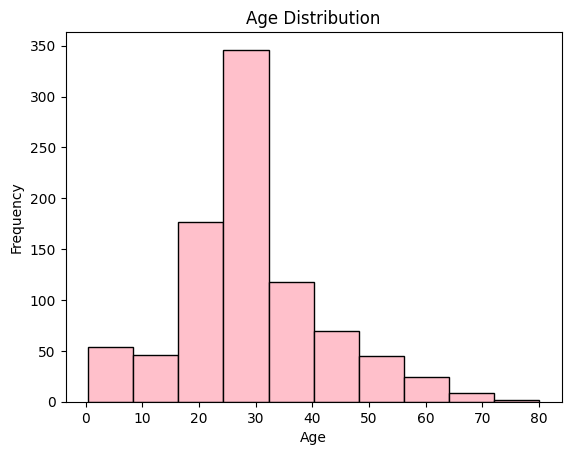

In [23]:
import matplotlib.pyplot as plt
plt.hist(data['age'], bins=10, edgecolor='black', color='pink')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**5. Boxplot to identify outliers in the fare and age**

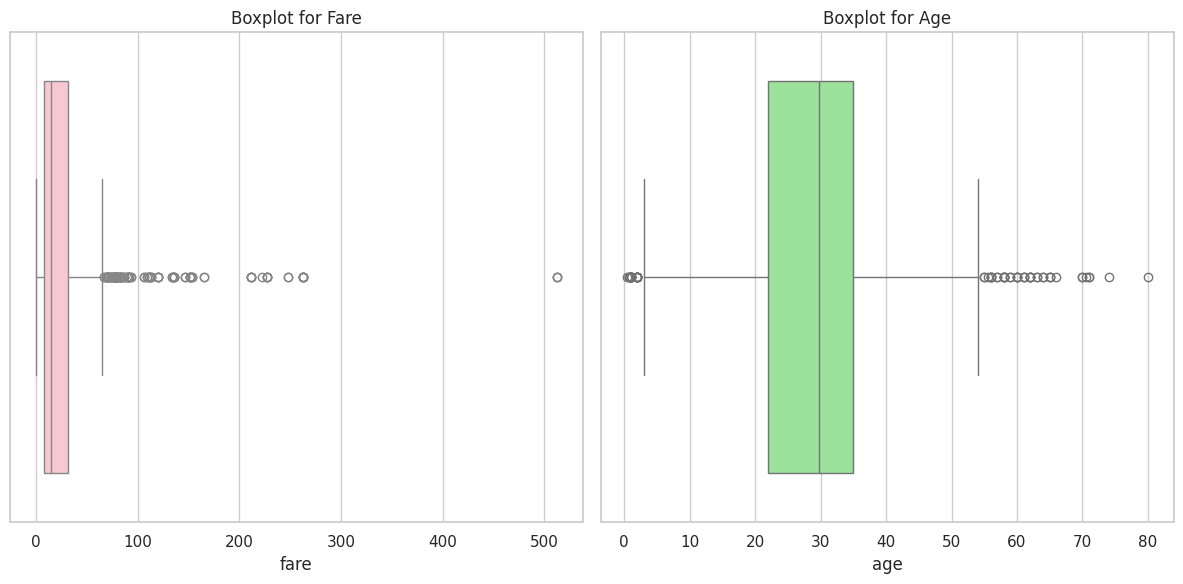

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # First subplot
sns.boxplot(x=data['fare'], color='pink')
plt.title('Boxplot for Fare')

plt.subplot(1, 2, 2)  # Second subplot
sns.boxplot(x=data['age'], color='lightgreen')
plt.title('Boxplot for Age')

plt.tight_layout()
plt.show()

**6. Correlation between numerical columns using a heatmap**

In [28]:
#Correlation Matrix
numerical_data = data.drop(columns=['sex','embarked','class','who','adult_male','embark_town','alive','alone'])
numerical_data.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [29]:
correlation_matrix = numerical_data.corr()
print("correlation_matrix:")
print(correlation_matrix)

correlation_matrix:
          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500
age      -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566
sibsp    -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000


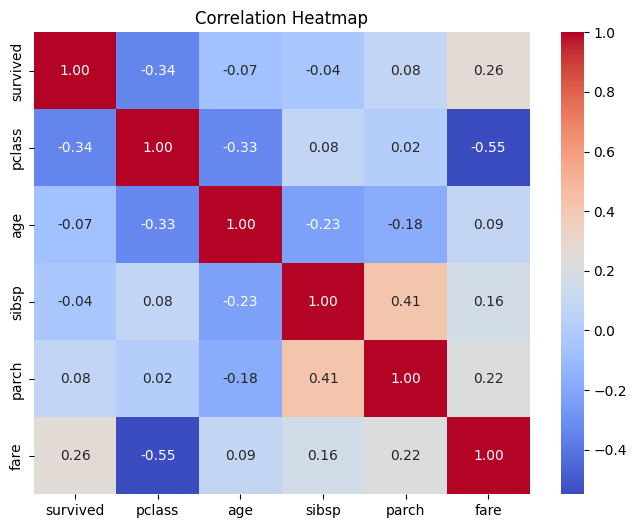

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**7. Average fare for each class**

In [31]:
Average_fare_by_class = data.groupby('class')['fare'].mean()
print("Average fare by class:")
print(Average_fare_by_class)

Average fare by class:
class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


**8. Scatter plot to visualize the relationship between fare and age**

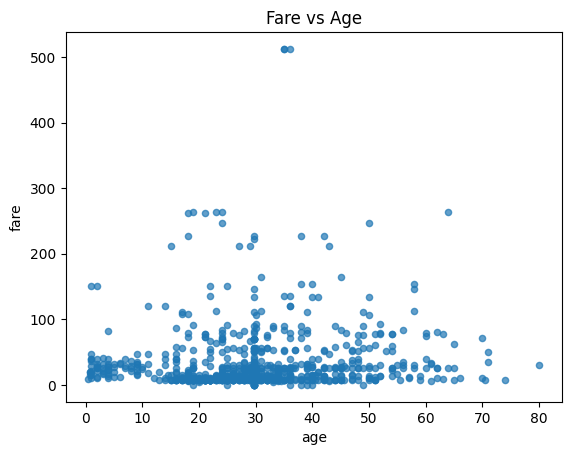

In [33]:
data.plot(kind = 'scatter' , x = 'age' , y = 'fare', alpha = 0.7)
plt.title('Fare vs Age')
plt.show()